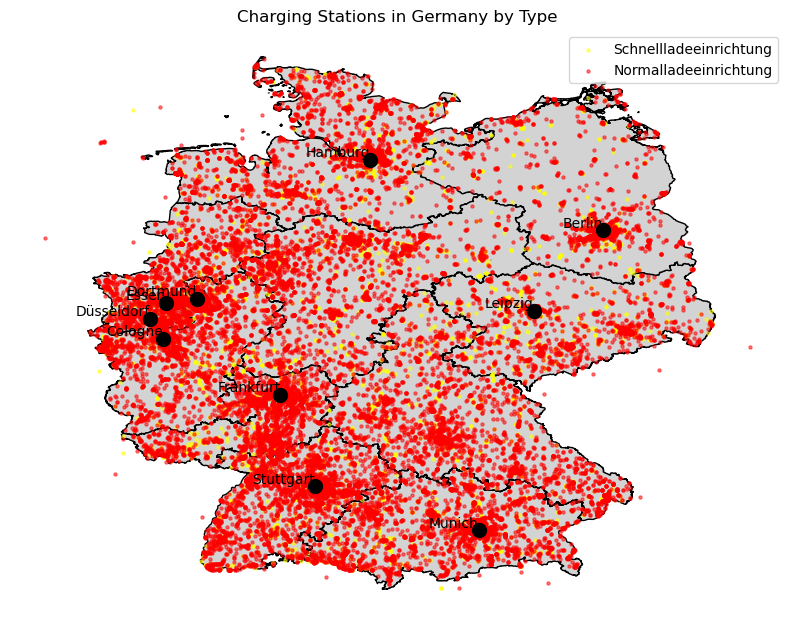

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# DE KArte
germany = gpd.read_file('plz-1stellig.shp')

# read csv
charging_data = pd.read_csv('charging_data.csv')

# Inbetriebnahmedatums in Datetime-Format
charging_data['inbetriebnahmedatum'] = pd.to_datetime(charging_data['inbetriebnahmedatum'])

# Filter Schnellladeeinrichtungen
fast_charging_data = charging_data[charging_data['art_der_ladeeinrichung'] == 'Schnellladeeinrichtung']

# Filter Normalladeeinrichtungen
normal_charging_data = charging_data[charging_data['art_der_ladeeinrichung'] == 'Normalladeeinrichtung']

# convert GeoDataFRame
fast_charging_gdf = gpd.GeoDataFrame(fast_charging_data, geometry=gpd.points_from_xy(fast_charging_data.laengengrad, fast_charging_data.breitengrad))
normal_charging_gdf = gpd.GeoDataFrame(normal_charging_data, geometry=gpd.points_from_xy(normal_charging_data.laengengrad, normal_charging_data.breitengrad))

# DE Karte erstellen
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
germany.plot(ax=ax, color='lightgrey', edgecolor='black')

# Schnellladeeinrichtungen gelbe Punkte
fast_charging_gdf.plot(ax=ax, color='yellow', markersize=5, alpha=0.5, label='Schnellladeeinrichtung')

# Normalladeeinrichtungen rote Punkte
normal_charging_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5, label='Normalladeeinrichtung')

# Top 10 Städte DE mit Koordinaten
cities = {
    'Berlin': (13.4049, 52.5200),
    'Hamburg': (9.9937, 53.5511),
    'Munich': (11.5819, 48.1351),
    'Cologne': (6.9603, 50.9375),
    'Frankfurt': (8.6821, 50.1109),
    'Stuttgart': (9.1829, 48.7758),
    'Düsseldorf': (6.7735, 51.2277),
    'Dortmund': (7.4686, 51.5136),
    'Essen': (7.0117, 51.4556),
    'Leipzig': (12.3874, 51.3438)
}

# Plotten Top 10 Städte mit BEschriftung
for city, coords in cities.items():
    ax.plot(coords[0], coords[1], marker='o', color='black', markersize=10)
    ax.text(coords[0], coords[1], city, fontsize=10, ha='right', va='bottom')

# Legende + alles anzeigen
plt.title('Charging Stations in Germany by Type')
plt.axis("off")
plt.legend()
plt.show()

